<a href="https://colab.research.google.com/github/ND-CSE-30151/spring-2024/blob/main/notes/32-npc-reductions2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Notebook 32: More NP-completeness reductions

<div class="alert alert-info">
    <p><b>Read</b> pages 312-313.</p>
</div>

If $G$ is a graph, a *vertex cover* of $G$ is a subset $C$ of nodes such that every edge in $G$ touches a node in $C$. For example, in the graph

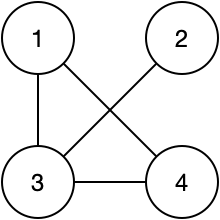

{1,3} and {3,4} are both vertex covers of size 2.

The vertex cover problem is to decide, given $G$ and a number $k$, whether $G$ has a vertex cover of size $k$. More formally, VERTEX-COVER is the set of pairs $\langle G, k\rangle$ where $G$ is a graph and there is a subset $C$ of $k$ nodes such that every edge in $G$ touches a node in $C$.

Proof that VERTEX-COVER is in NP: If $G$ has $|V|$ nodes and is stored as an adjacency matrix, the size of the input is $n \in O(|V|^2 + \log k)$. We can check whether a subset $C$ is a vertex cover by looping over all $(u, v)$, and if $(u, v)$ is an edge of $G$, check that either $u$ or $v$ belongs to $C$. This takes $O(|V|^2) \leq O(n)$ time.

Proof that VERTEX-COVER is NP-hard: By reduction from 3SAT. We need to show how to convert a formula $\phi$ into a pair $\langle G, k\rangle$.

> Interior monologue:
>
> Initially VERTEX-COVER seems very similar to CLIQUE; they have the same type of input (a graph $G$ and number $k$) and same type of certificate (a set of $k$ nodes). We can brainstorm possible reductions as before, and discard some of them immediately for the same reasons as before. The two viable ideas are:
>
> - For each variable $x$, create a node for $x$ and its negation $\neg x$. If $x$ is true, put node $x$ in $C$; if $x$ is false, put node $\neg x$ in $C$.
>
> - For each literal, create a node. If a literal is lucky, put its node in $C$.

> Let's think about the first idea. If we put an edge between $x$ and $\neg x$, we can ensure that, for each variable $x$, at least one node ($x$ or $\neg x$) belongs to $C$. And we can make it exactly one if we set $k = l$.
>
> 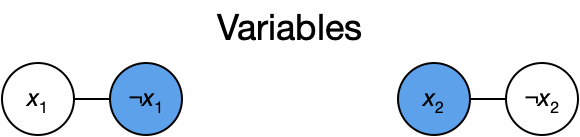

For each variable $x_i$, create a variable gadget containing a node for $x_i$ and a node for $\neg x_i$, and connect the two nodes with an edge.

> Set this idea aside for a moment and let's think about the second idea. We create clause gadgets with a node for each literal, and we need to ensure that exactly one literal is lucky.
>
> - If we could, we would draw an edge like this:
>
> 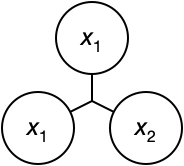
>
> that would ensure that each clause has at least one lucky literal. But edges like this aren't allowed.
>
> - But if we connect all three literals in a clause by edges, then the vertex cover will have to contain at least two of them. We can make it exactly two by setting $k = 2m$ (not counting the variable gadgets, which we've set aside temporarily). So let's make the *unlucky* literals to be nodes in $C$.
>
> 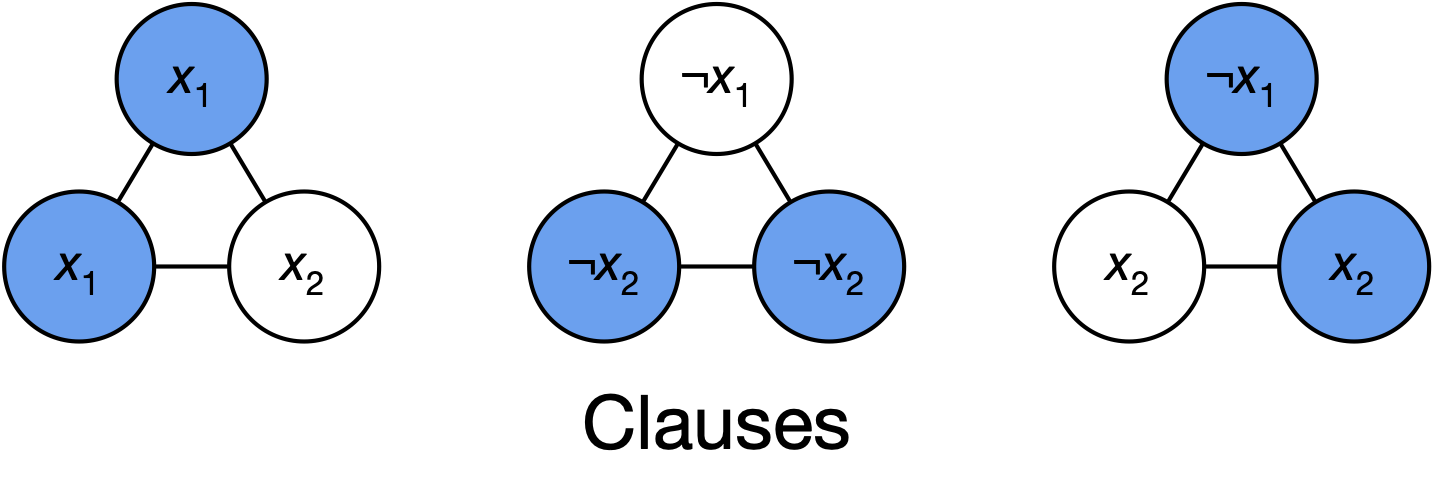

For each clause in $\phi$, create a clause gadget consisting of three nodes in $G$ labeled with its three literals, all connected by edges.

> We didn't set $k$ yet. If we end up combining both ideas, we'll need to set $k = l + 2m$; if we use just the second idea, we'll set $k = 2m$.

> We still need to ensure that $\phi$ is true.
>
> For CLIQUE, we were able to ensure that no lucky literals are contradictory by adding edges between nodes in the clause gadgets. The same idea will work here: set $k=2m$ and, for every pair of contradictory nodes, add an edge between them. (The resulting graph is the complement of the graph we created for CLIQUE.)
>
> But the book instead combines the two ideas: keep both the variable and clause gadgets, and add edges to ensure that every lucky literal is true. Consider a single clause, and imagine connecting each literal to another node like this:
>
> 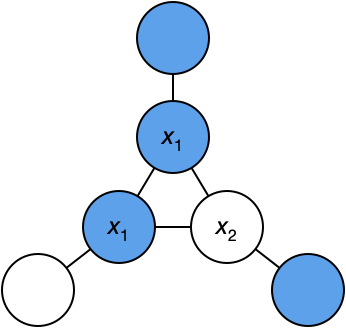
>
> The nodes connected to the unlucky literals could be in or out, but the node connected to the lucky literal ($x_2$) must be in. And in the variable gadgets, true nodes are in. So if we connect each literal $a$ in a clause gadget to node $a$ in the variable gadgets, we've encoded the constraint that lucky literals must be true.

Set $k = l + 2m$.

For each variable-gadget node $u$ and each clause-gadget node $v$ with the same label, connect $u$ and $v$ with an edge. For our example formula, here's what the resulting graph looks like, with one possible $C$ marked in blue (but we emphasize, the coloring is only for illustration and *not* part of the reduction).

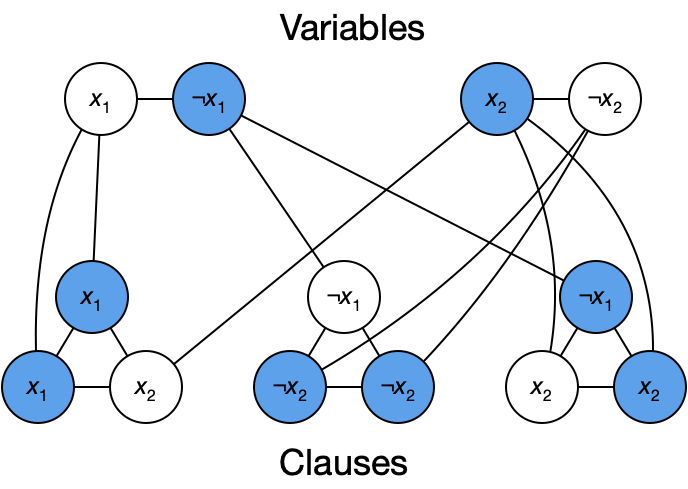

Now we need to show that $\phi$ is satisfiable iff $G$ has a $k$-vertex cover. Again, please see the book for how to write this, and again, it's okay to say that's obvious that the conversion runs in polynomial time.

### The subset-sum problem

<div class="alert alert-info">
    <p><b>Read</b> from the bottom of page 319 to the top of page 322.</p>
</div>

SUBSET-SUM is the set of pairs $\langle S, t\rangle$ where $S$ is a set of $n$ natural numbers and $t$ is a natural number, and there is a subset $C \subseteq S$ such that $\sum C = t$. For example, $\langle \{4,11,16,21,27\}, 25 \rangle$ belongs to SUBSET-SUM because $4+21=25$.

SUBSET-SUM is in NP because we can check whether a subset $C$ adds up to $t$ in $O(n)$ time.

We prove that SUBSET-SUM is NP-hard by reduction from 3SAT. We need to define a mapping from formulas $\phi$ to pairs $\langle S, t\rangle$.

> Interior monologue
>
> A certificate is a subset $C \subseteq S$; in other words, a certificate says for each $c \in C$ whether $c$ is "in" or "out".
>
> - We could create a number in $S$ for each literal, and $C$ contains the numbers corresponding to lucky literals.
>
> - We could create a number in $S$ for each variable and its negation, and $C$ contains the numbers corresponding to true variables and negations of false variables.
>
> Let's think about the first of these options. We can ensure that exactly one literal in each clause is lucky like so:
>
> 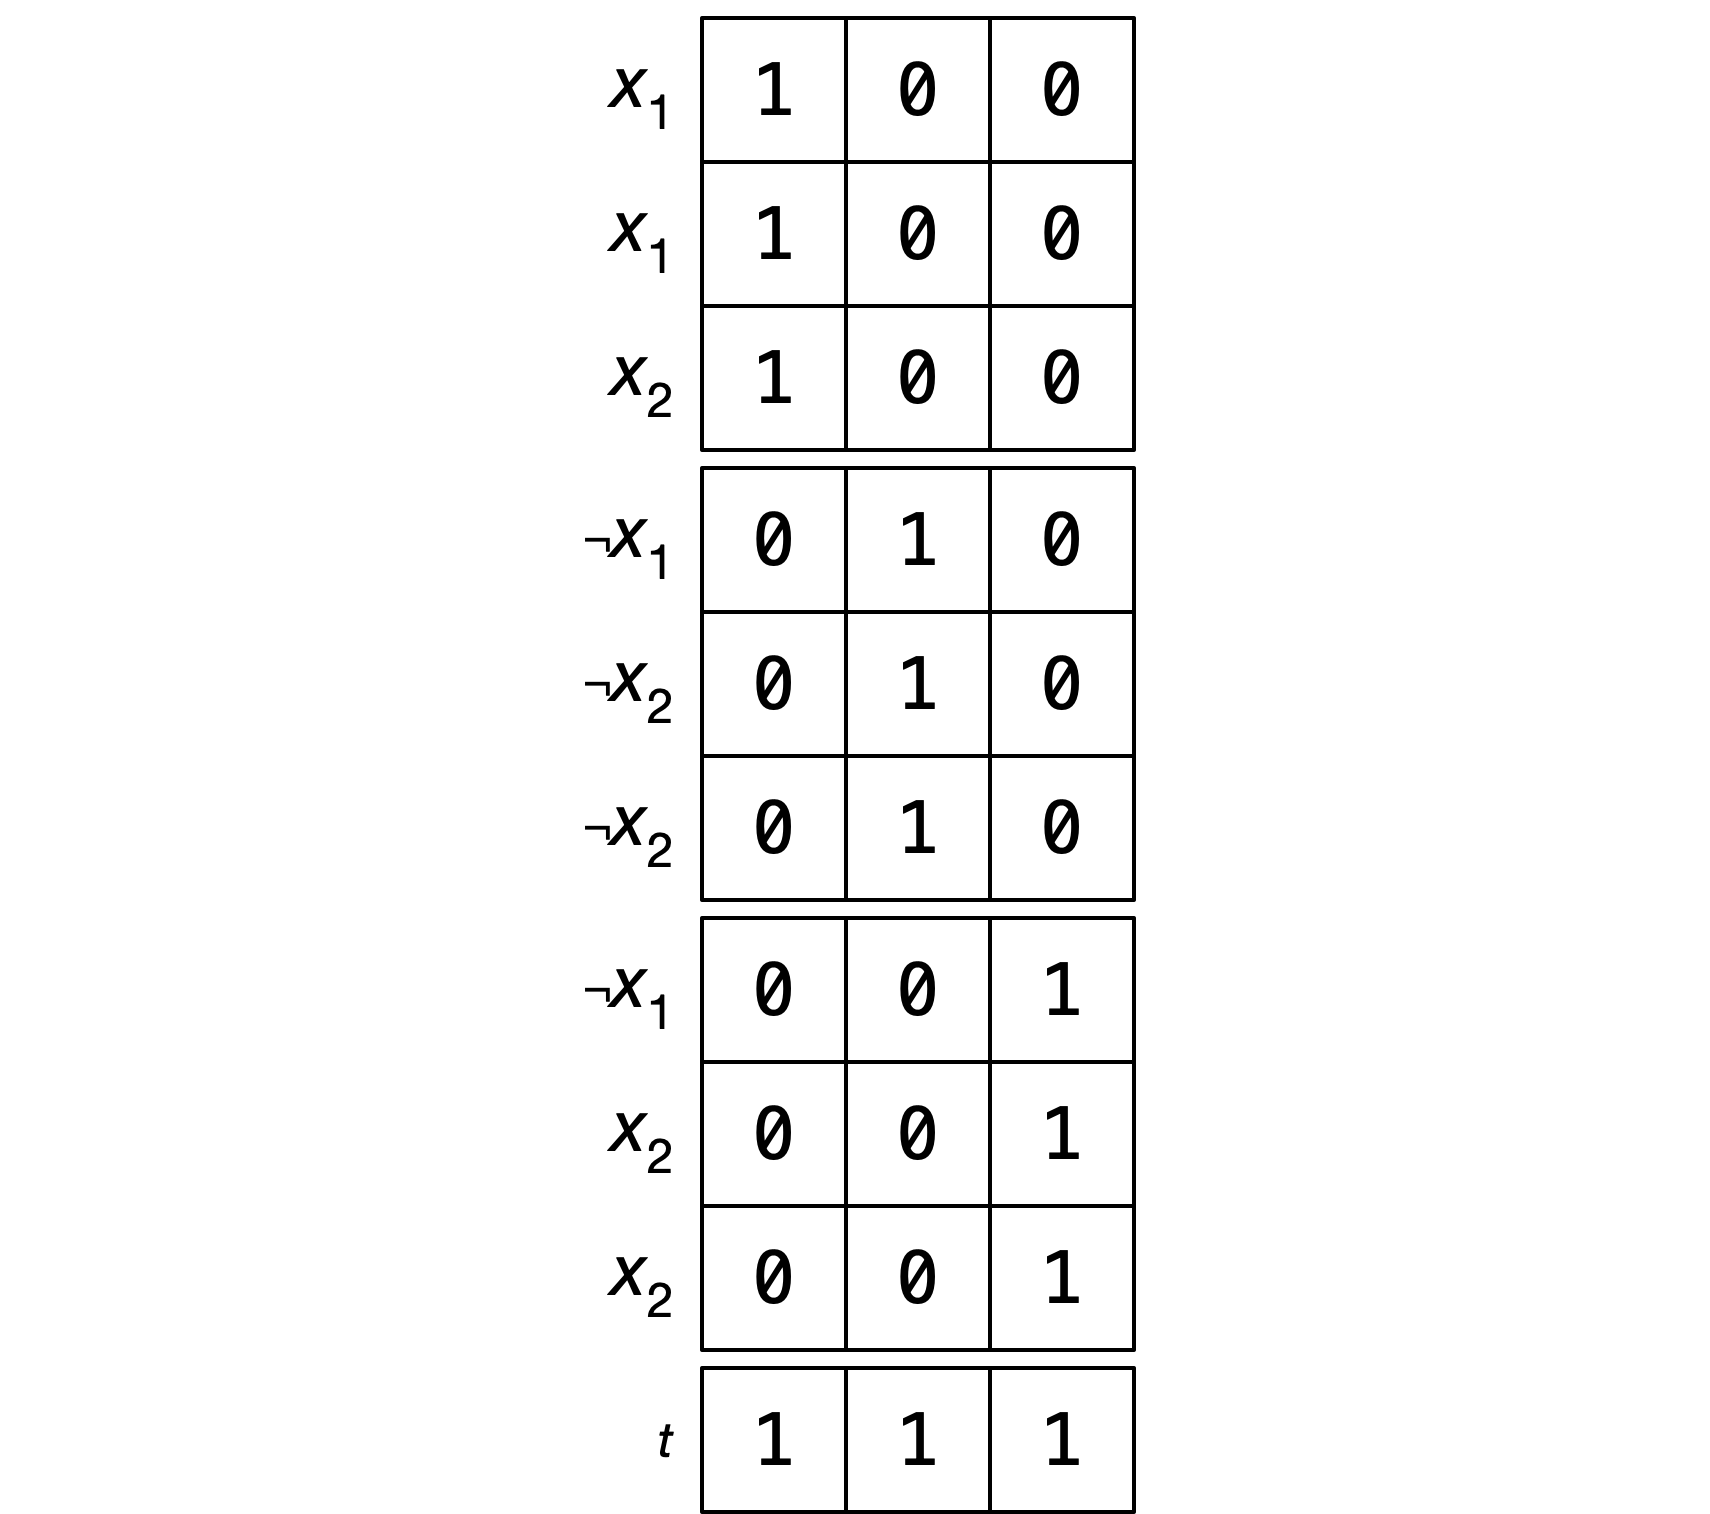
>
> But it's not clear how to ensure that no lucky literals are contradictory.

> So let's think more about the second option. We need to ensure that every variable is either true or false, and we need to ensure that each clause is true.
>
> To ensure that every variable is true or false, we can do this:
>
> 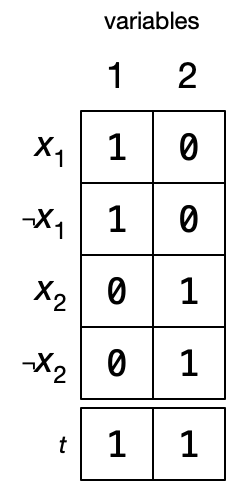

For each variable $x_i$, we will add two numbers, $p_i$ and $q_i$, to $S$, corresponding to $x_i$ and $\neg x_i$.

The first $l$ digits of each number are used to ensure that $p_i$ and $q_i$ are not both included in $C$. Let the $i$'th digit of $p_i$ and $q_i$ be 1; let the rest of the first $l$ digits be 0. Let the first $l$ digits of $t$ be 1's.

> To ensure that every clause is true, we can add a new digit for each clause, like this:
>
> 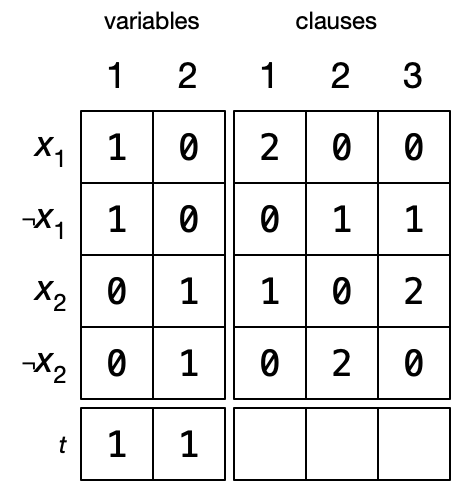

The next $m$ digits (that is, digits $l+1$ through $l+m$) are used to ensure that all clauses are true. Let the $(l+j)$th digit of $p_i$ be the number of times that $x_i$ occurs in the $j$th clause, and let the $(l+j)$th digit of $q_i$ be the number of times that $\neg x_i$ occurs in the $j$th clause.

> But, it's not clear what the values of these new digits in $t$ should be. In a satisfying assignment, *at least* one literal in every clause is true, but we only know how to use $t$ to enforce an *exact* number. We can fix this by adding some "slack" numbers to $S$:
>
> 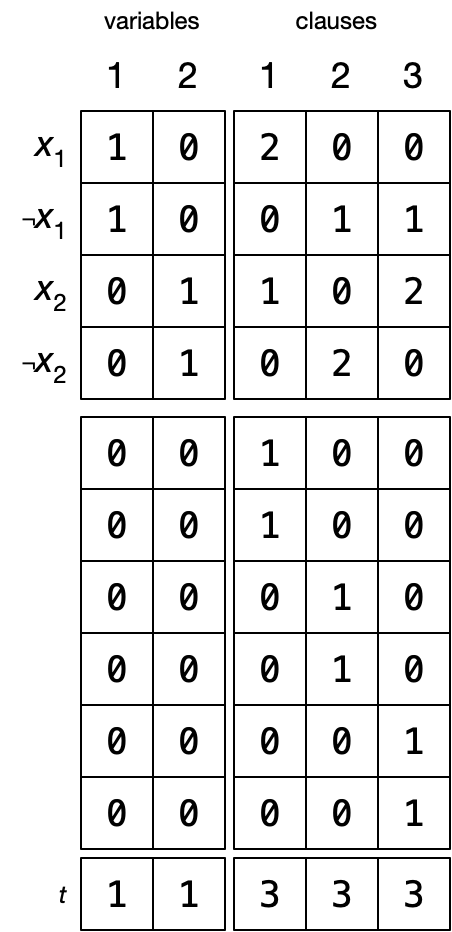
>
> Now, if a clause digit adds up to 1 or 2, we can use the "slack" numbers to bring the sum up to 3. But if a clause digit adds up to 0, there aren't enough "slack" numbers to bring the sum up to 3.

For each clause $j$, add two numbers that have a 1 in digit $l+j$ and 0's elsewhere.

Again, the proof that $\phi$ is satisfiable iff $S$ has a subset that sums to $t$ can be found in the book, and again it's obvious that $S$ and $t$ can be constructed in polynomial time.